In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Polynomial Regression

### Generate random data to $\theta_3x^3 + \theta_2x^2 + \theta_1x + \theta_0$

-2.6938879189934357 x^3 + -0.3419385599898137 x^2 + 1.6289723091157915 x + 1


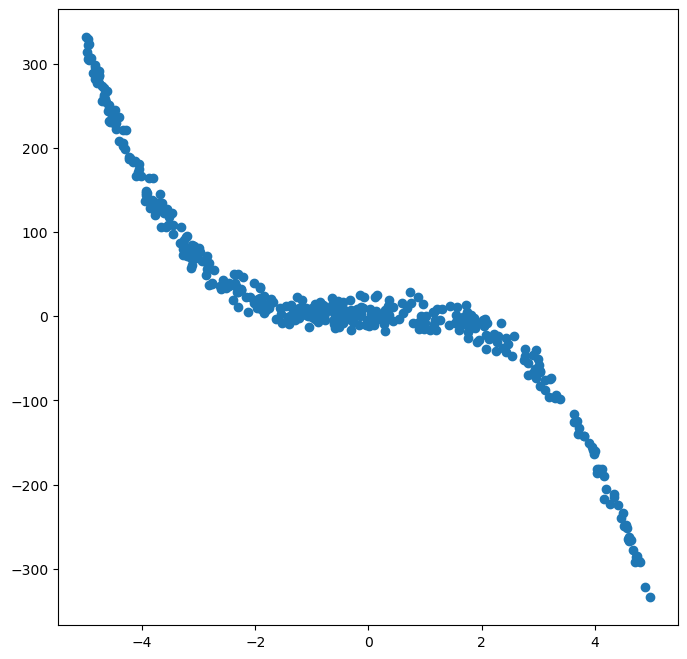

In [200]:
n = 500
theta0 = np.random.randint(1, 10)
theta1, theta2, theta3 = np.random.randn(3) * 5

print(f'{theta3} x^3 + {theta2} x^2 + {theta1} x + {theta0}')

X = 10 * np.random.rand(n, 1) - 5
y = theta3*X**3 + theta2*X**2 + theta1*X + theta0 + np.random.normal(loc= 1, scale= 10, size= (n, 1))

X = X.ravel()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

plt.figure(figsize= (8, 8))
plt.scatter(X_train, y_train)
plt.show()

### Construct polynomial feature set

In [190]:
degree = 30
poly_features = PolynomialFeatures(degree= degree, include_bias= False)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

In [191]:
for i in np.arange(1, degree+1):
    print(f'{X_train[0]**i} \t {X_train_poly[0][i-1]}')

-3.7047156989273833 	 -3.7047156989273833
13.72491840987901 	 13.72491840987901
-50.84692069957622 	 -50.84692069957622
188.3733853578358 	 188.37338535783576
-697.8698379952718 	 -697.8698379952718
2585.4093446289935 	 2585.409344628993
-9578.20658720059 	 -9578.206587200588
35484.53231117169 	 35484.53231117169
-131460.10392229375 	 -131460.10392229375
487022.310783547 	 487022.31078354694
-1804279.2004876975 	 -1804279.2004876975
6684341.479294921 	 6684341.47929492
-24763584.81533538 	 -24763584.815335378
91742041.42709276 	 91742041.42709275
-339878181.12659687 	 -339878181.12659687
1259152033.3425882 	 1259152033.3425882
-4664800305.260622 	 -4664800305.260622
17281758923.260277 	 17281758923.260277
-64024003588.08074 	 -64024003588.08074
237190731200.94583 	 237190731200.94583
-878724225520.2091 	 -878724225520.2091
3255423433312.5254 	 3255423433312.525
-12060418300048.994 	 -12060418300048.992
44680421011822.61 	 44680421011822.61
-165528257157184.16 	 -165528257157184.12
6132

### Fit Regressors

In [192]:
print(f'{theta0} + {theta1} x + {theta2} x + {theta3} x^3')

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

print(f'x^0: {np.round(lin_reg.intercept_, 8)}')
for i in np.arange(lin_reg.coef_.shape[0]):
    print(f'x^{i+1}: {np.round(lin_reg.coef_[i], 8)}')

3 + -1.276418433721864 x + 3.7564234656588464 x + 3.545012597946731 x^3
x^0: 11.60429812
x^1: 8e-08
x^2: 9.6e-07
x^3: -5.5e-07
x^4: 1e-08
x^5: 0.0
x^6: 4e-08
x^7: 1e-08
x^8: 2.8e-07
x^9: 7e-08
x^10: 1.58e-06
x^11: 3.8e-07
x^12: 7.39e-06
x^13: 1.78e-06
x^14: 2.591e-05
x^15: 6.88e-06
x^16: 4.922e-05
x^17: 1.597e-05
x^18: -2.065e-05
x^19: -5.08e-06
x^20: 3.43e-06
x^21: 6.4e-07
x^22: -3.1e-07
x^23: -4e-08
x^24: 2e-08
x^25: 0.0
x^26: -0.0
x^27: -0.0
x^28: 0.0
x^29: 0.0
x^30: -0.0


In [193]:
print(f'{theta0} + {theta1} x + {theta2} x + {theta3} x^3')

ridge = Ridge(max_iter= 100000)
ridge.fit(X= X_train_poly, y= y_train)

print(f'x^0: {np.round(ridge.intercept_, 8)}')
for i in np.arange(ridge.coef_.shape[0]):
    print(f'x^{i+1}: {np.round(ridge.coef_[i], 8)}')

3 + -1.276418433721864 x + 3.7564234656588464 x + 3.545012597946731 x^3
x^0: 14.31188683
x^1: 0.00270115
x^2: 0.00049365
x^3: 0.00032197
x^4: -2.756e-05
x^5: 9.1e-06
x^6: 5.313e-05
x^7: 0.00010548
x^8: 1.288e-05
x^9: 0.0001358
x^10: 4.259e-05
x^11: -2.329e-05
x^12: -3.177e-05
x^13: -1.687e-05
x^14: 4.664e-05
x^15: 0.00032005
x^16: 3.541e-05
x^17: -0.00011365
x^18: -1.657e-05
x^19: 1.747e-05
x^20: 2.81e-06
x^21: -1.49e-06
x^22: -2.6e-07
x^23: 8e-08
x^24: 1e-08
x^25: -0.0
x^26: -0.0
x^27: 0.0
x^28: 0.0
x^29: -0.0
x^30: -0.0


In [194]:
print(f'{theta0} + {theta1} x + {theta2} x + {theta3} x^3')

lasso = Lasso(max_iter= 100000)
lasso.fit(X= X_train_poly, y= y_train)

print(f'x^0: {np.round(lasso.intercept_, 8)}')
for i in np.arange(lasso.coef_.shape[0]):
    print(f'x^{i+1}: {np.round(lasso.coef_[i], 8)}')

3 + -1.276418433721864 x + 3.7564234656588464 x + 3.545012597946731 x^3
x^0: 6.38594924
x^1: 0.0
x^2: 0.0
x^3: 1.88611717
x^4: 0.98646998
x^5: 0.34166349
x^6: -0.08867321
x^7: -0.02115924
x^8: 0.00237267
x^9: 8.613e-05
x^10: 4.371e-05
x^11: 1.308e-05
x^12: -7.7e-07
x^13: 3.5e-07
x^14: -5e-08
x^15: 0.0
x^16: -0.0
x^17: -0.0
x^18: -0.0
x^19: -0.0
x^20: 0.0
x^21: -0.0
x^22: 0.0
x^23: -0.0
x^24: 0.0
x^25: -0.0
x^26: 0.0
x^27: 0.0
x^28: -0.0
x^29: 0.0
x^30: -0.0


/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+04, tolerance: 1.117e+03
  model = cd_fast.enet_coordinate_descent(


######## RMSE ########
Linear Regression: 19.401077902432373
Ridge Regression: 29.99271632765124
Lasso Regression: 9.44352297589176


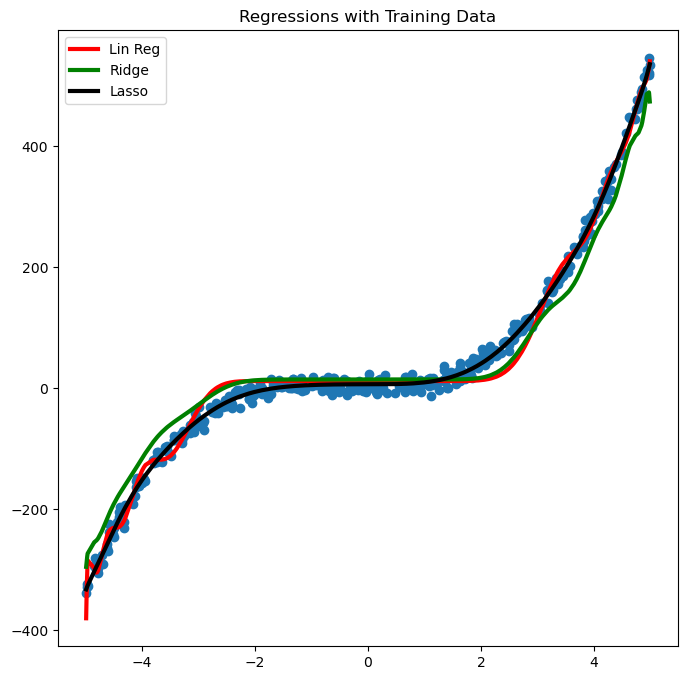

In [195]:
print(f'######## RMSE ########')
print(f'Linear Regression: {np.sqrt(mean_squared_error(y_true= y_train, y_pred= lin_reg.predict(X_train_poly)))}')
print(f'Ridge Regression: {np.sqrt(mean_squared_error(y_true= y_train, y_pred= ridge.predict(X_train_poly)))}')
print(f'Lasso Regression: {np.sqrt(mean_squared_error(y_true= y_train, y_pred= lasso.predict(X_train_poly)))}')
order = X_train.argsort()
plt.figure(figsize= (8, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train[order], lin_reg.predict(X_train_poly[order]), linewidth= 3, c= 'r', label= 'Lin Reg')
plt.plot(X_train[order], ridge.predict(X_train_poly[order]), linewidth= 3, c= 'g', label= 'Ridge')
plt.plot(X_train[order], lasso.predict(X_train_poly[order]), linewidth= 3, c= 'k', label= 'Lasso')
plt.title('Regressions with Training Data')
plt.legend()
plt.show()

######## RMSE ########
Linear Regression: 19.197548146175176
Ridge Regression: 30.399919529512438
Lasso Regression: 9.646000999757167


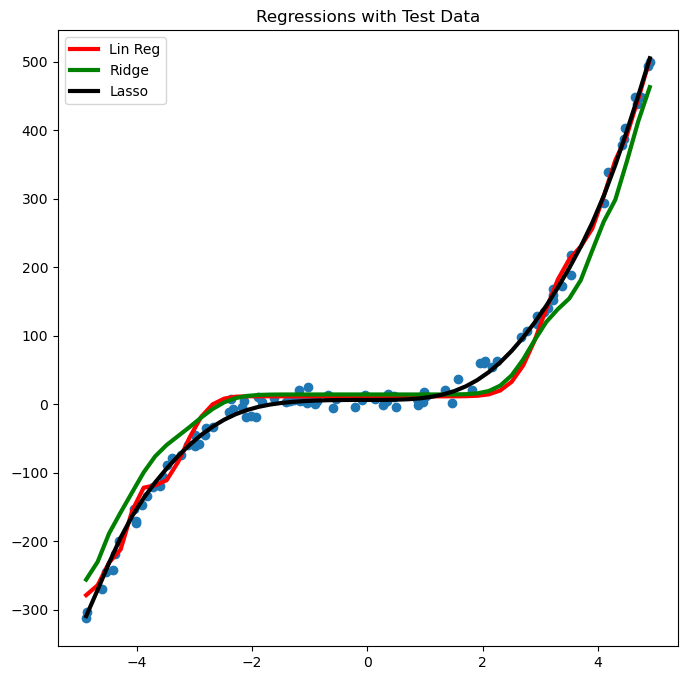

In [196]:
print(f'######## RMSE ########')
print(f'Linear Regression: {np.sqrt(mean_squared_error(y_true= y_test, y_pred= lin_reg.predict(X_test_poly)))}')
print(f'Ridge Regression: {np.sqrt(mean_squared_error(y_true= y_test, y_pred= ridge.predict(X_test_poly)))}')
print(f'Lasso Regression: {np.sqrt(mean_squared_error(y_true= y_test, y_pred= lasso.predict(X_test_poly)))}')

X_plot = np.linspace(start= X_test.min(), stop= X_test.max()).reshape(-1, 1)
X_plot = poly_features.transform(X_plot)

plt.figure(figsize= (8, 8))
plt.scatter(X_test, y_test)
plt.plot(X_plot[:, 0], lin_reg.predict(X_plot), linewidth= 3, c= 'r',label= 'Lin Reg')
plt.plot(X_plot[:, 0], ridge.predict(X_plot), linewidth= 3, c= 'g', label= 'Ridge')
plt.plot(X_plot[:, 0], lasso.predict(X_plot), linewidth= 3, c= 'k', label= 'Lasso')
plt.title('Regressions with Test Data')
plt.legend()
plt.show()